In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [46]:
df1= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\Warangal_aqi.csv")

In [47]:
df1

,date,pm10,SO2,NOx,rainfall
0,01/01/2016,76,7.0,26.0,NaN
1,01/02/2016,72,7.0,19.0,NaN
2,01/03/2016,63,7.1,21.8,NaN
3,01/04/2016,73,7.0,20.0,NaN
4,01/05/2016,84,8.0,19.0,NaN
...,...,...,...,...,...
79,01/08/2022,56,6.5,26.6,344.7
80,01/09/2022,48,7.1,29.9,166.6
81,01/10/2022,63,7.9,32.2,NaN
82,01/11/2022,95,7.6,35.0,NaN


In [48]:
df1['date']=pd.to_datetime(df1.date, format='%d/%m/%Y')

In [51]:
print(pd.infer_freq(df1.index))

MS


In [50]:
df1= df1.set_index('date')

In [28]:
p_max=df1["pm10"].max()
S_max=df1["SO2"].max()
N_max=df1["Nox"].max()
R_max=df1['rainfall'].max()

In [24]:
df1["rainfall"]=df1["rainfall"].fillna(0)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-01-12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      84 non-null     int64  
 1   SO2       84 non-null     float64
 2   NOx       84 non-null     float64
 3   rainfall  84 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

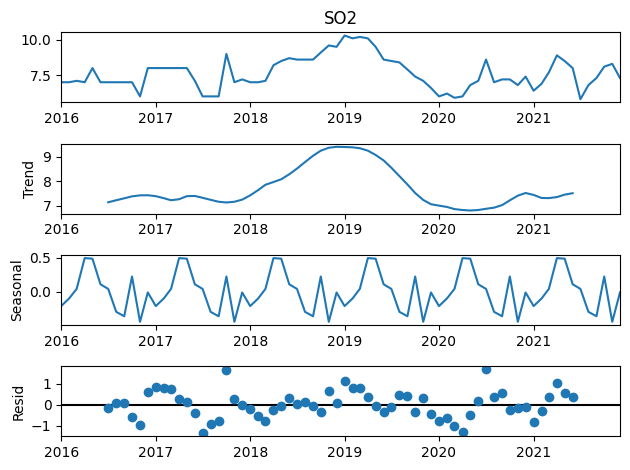

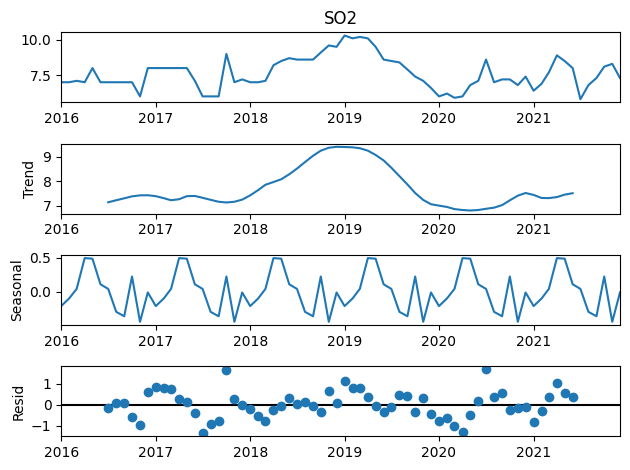

In [53]:
decompose_result = seasonal_decompose(train, period=12 ,model='add')
decompose_result.plot()

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [59]:
warangal_so2 = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction= warangal_so2.forecast(len(test))

for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print("RMSE: ",rmse)
mape1= mape(test, prediction)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:7.496556273512895   Expected:7.1
Prediction:7.5888327091373355   Expected:8.4
Prediction:7.748034959810717   Expected:8.0
Prediction:8.119124220480835   Expected:7.6
Prediction:8.252221677801163   Expected:7.8
Prediction:7.790665682540547   Expected:7.5
Prediction:7.479822828038467   Expected:7.2
Prediction:7.366211684507689   Expected:6.5
Prediction:7.411505064519986   Expected:7.1
Prediction:7.9984923271535635   Expected:7.9
Prediction:7.582536056172615   Expected:7.6
Prediction:7.734817634828109   Expected:8.3
RMSE:  0.473665872997474
MAPE: 5.40 %


In [60]:
train1=df1["pm10"][:72]
test1=df1["pm10"][72:]

In [75]:
warangal_pm10 = ExponentialSmoothing(
    train1,
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction1= warangal_pm10.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction1[i], test1[i]))
rmse= mse(test1, prediction1, squared=False)
print("RMSE: ",rmse)
mape1= mape(test1, prediction1)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:73.27360556662984   Expected:73
Prediction:74.58220774810312   Expected:73
Prediction:64.76900838079723   Expected:76
Prediction:58.17031027803843   Expected:60
Prediction:61.19893222209045   Expected:77
Prediction:63.00505399696628   Expected:85
Prediction:50.186317226413934   Expected:47
Prediction:50.06514723086497   Expected:56
Prediction:49.999289328867846   Expected:48
Prediction:60.77130489905679   Expected:63
Prediction:76.05883482911203   Expected:95
Prediction:75.68940859370092   Expected:95
RMSE:  11.73143421260447
MAPE: 11.01 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [68]:
train2=df1["NOx"][:72]
test2=df1["NOx"][72:]

In [73]:
warangal_nox = ExponentialSmoothing(
    train2,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction2= warangal_nox.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction2[i], test2[i]))
rmse= mse(test2, prediction2, squared=False)
print("RMSE: ",rmse)
mape1= mape(test2, prediction2)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:34.69020546971313   Expected:31.8
Prediction:36.970181611054876   Expected:31.0
Prediction:31.97683416884039   Expected:33.1
Prediction:32.13239583567015   Expected:34.2
Prediction:32.89197486955991   Expected:34.2
Prediction:29.57514973222837   Expected:34.7
Prediction:31.005276003056657   Expected:30.2
Prediction:31.803590496931825   Expected:26.6
Prediction:30.23290707680171   Expected:29.9
Prediction:31.005036364828175   Expected:32.2
Prediction:35.988066890464275   Expected:35.0
Prediction:32.309166672257135   Expected:32.6
RMSE:  2.9976840159849716
MAPE: 7.26 %


In [79]:
pred_len=12

In [88]:
warangal_so2 = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_SO2= warangal_so2.forecast(pred_len)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
warangal_nox = ExponentialSmoothing(
    df1['NOx'],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_NOx= warangal_nox.forecast(pred_len)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
warangal_pm10 = ExponentialSmoothing(
    df1['pm10'],
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_PM10= warangal_pm10.forecast(pred_len)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [92]:
pred= pd.DataFrame(data=pred_2023_SO2, columns=['SO2'])
pred['PM10']=pred_2023_PM10
pred['NOx']=pred_2023_NOx

In [93]:
pred

,SO2,PM10,NOx
2023-01-01,8.062079,91.680169,35.318394
2023-02-01,8.341578,92.912556,37.300794
2023-03-01,8.426545,85.008955,32.880870
2023-04-01,8.705633,77.127915,33.139591
2023-05-01,8.861698,82.222488,33.808436
2023-06-01,8.385519,85.017573,30.869340
2023-07-01,8.050478,68.693678,31.549733
2023-08-01,7.843034,69.945047,31.866376
2023-09-01,7.969704,68.786928,30.777927
2023-10-01,8.636632,80.185857,31.723596


In [94]:
## PM10 Sub-Index calculation
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    else:
        return 0

pred["PM10_SubIndex"] = pred["PM10"].apply(lambda x: PM10_subindex(x))

In [95]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["NOx_SubIndex"] = pred['NOx'].apply(lambda x: get_NOx_subindex(x))

In [96]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["SO2_SubIndex"] = pred["SO2"].apply(lambda x: get_SO2_subindex(x))

In [97]:
pred

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex
2023-01-01,8.062079,91.680169,35.318394,91.680169,44.147992,10.077599
2023-02-01,8.341578,92.912556,37.300794,92.912556,46.625992,10.426973
2023-03-01,8.426545,85.008955,32.880870,85.008955,41.101087,10.533181
2023-04-01,8.705633,77.127915,33.139591,77.127915,41.424489,10.882041
2023-05-01,8.861698,82.222488,33.808436,82.222488,42.260545,11.077123
2023-06-01,8.385519,85.017573,30.869340,85.017573,38.586675,10.481899
2023-07-01,8.050478,68.693678,31.549733,68.693678,39.437167,10.063098
2023-08-01,7.843034,69.945047,31.866376,69.945047,39.832970,9.803792
2023-09-01,7.969704,68.786928,30.777927,68.786928,38.472409,9.962130
2023-10-01,8.636632,80.185857,31.723596,80.185857,39.654495,10.795790


In [98]:
pred['AQI']=''

In [99]:
for i in range(len(pred)):
    pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11120\3451392264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])


In [100]:
pred

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex,AQI
2023-01-01,8.062079,91.680169,35.318394,91.680169,44.147992,10.077599,91.680169
2023-02-01,8.341578,92.912556,37.300794,92.912556,46.625992,10.426973,92.912556
2023-03-01,8.426545,85.008955,32.880870,85.008955,41.101087,10.533181,85.008955
2023-04-01,8.705633,77.127915,33.139591,77.127915,41.424489,10.882041,77.127915
2023-05-01,8.861698,82.222488,33.808436,82.222488,42.260545,11.077123,82.222488
2023-06-01,8.385519,85.017573,30.869340,85.017573,38.586675,10.481899,85.017573
2023-07-01,8.050478,68.693678,31.549733,68.693678,39.437167,10.063098,68.693678
2023-08-01,7.843034,69.945047,31.866376,69.945047,39.832970,9.803792,69.945047
2023-09-01,7.969704,68.786928,30.777927,68.786928,38.472409,9.962130,68.786928
2023-10-01,8.636632,80.185857,31.723596,80.185857,39.654495,10.795790,80.185857


In [101]:
pred.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\warangal_aqi_prediction.csv")